In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import os


RESULT_DIR = '../results'
FIG_DIR = f'{RESULT_DIR}/figs'
os.makedirs(FIG_DIR, exist_ok=True)


# Clean data import phase
df = pd.read_csv("../data/dataCombined.csv")
df.head()

,D_Gender,D_Age,D_Education,D_Position,D_Experience,D_CompanyAge,D_NumEmployees,U_BIM,U_IoT,U_CloudComputing,...,B_LeadershipPolicyFailure,B_ProfessionalCooperationLack,B_FirmCooperationLack,B_ProfessionalTrustIssues,B_FirmTrustIssues,B_LackOfStandards,B_CompatibilityIssues,B_ClientUnawareness,B_ClientDisinterest,B_SatisfactionWithOldMethods
0,2,4,3,2,3,5,5,2,2,2,...,3,3,2,2,2,2,4,3,4,2
1,1,3,3,2,4,1,5,2,1,2,...,3,3,3,3,3,3,3,3,3,4
2,2,2,2,2,5,5,5,3,4,5,...,3,3,3,3,4,4,3,3,3,3
3,1,4,2,2,4,5,5,4,3,3,...,3,2,2,2,2,2,2,3,2,2
4,1,5,5,2,4,5,5,5,4,4,...,4,3,3,3,3,3,3,3,3,3


In [76]:
# Constants for each section prefix
DEMOGRAPHICS = "D_"
USAGE = "U_"
ADOPTION = "A_"
FACTORS = "F_"
PROJECT_DELIVERY = "P_"
SUSTAINABILITY = "S_"
BARRIERS = "B_"


PLOT_PALATTE = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"]

In [77]:
# Frequency tables for categorical data
demographic_cols = [col for col in df.columns if col.startswith(DEMOGRAPHICS)]
usage_cols = [col for col in df.columns if col.startswith(USAGE)]

for col in demographic_cols + usage_cols:
    print(f"\n--- Frequency Table: {col} ---")
    print(df[col].value_counts().sort_index())


--- Frequency Table: D_Gender ---
D_Gender
1    35
2    24
Name: count, dtype: int64

--- Frequency Table: D_Age ---
D_Age
2    16
3    21
4    12
5    10
Name: count, dtype: int64

--- Frequency Table: D_Education ---
D_Education
1    12
2    22
3    15
4     7
5     3
Name: count, dtype: int64

--- Frequency Table: D_Position ---
D_Position
1    23
2    36
Name: count, dtype: int64

--- Frequency Table: D_Experience ---
D_Experience
1    13
2    11
3    12
4    14
5     9
Name: count, dtype: int64

--- Frequency Table: D_CompanyAge ---
D_CompanyAge
1     4
2    11
3    13
4    12
5    19
Name: count, dtype: int64

--- Frequency Table: D_NumEmployees ---
D_NumEmployees
2     8
3    11
4    12
5    28
Name: count, dtype: int64

--- Frequency Table: U_BIM ---
U_BIM
2    37
3    18
4     2
5     2
Name: count, dtype: int64

--- Frequency Table: U_IoT ---
U_IoT
1     1
2    24
3    30
4     2
5     2
Name: count, dtype: int64

--- Frequency Table: U_CloudComputing ---
U_CloudComputing
2 

## Data summary

In [78]:
likert_cols = [col for col in df.columns if col.startswith((ADOPTION))]

means = df[likert_cols].mean()
medians = df[likert_cols].median()
modes = df[likert_cols].mode().iloc[0]

summary = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Mode': modes
})

summary.head(10)

,Mean,Median,Mode
A_StreamlineData,3.542373,4.0,4
A_AnalyzeTrends,3.525424,4.0,4
A_RealTimeComm,3.508475,4.0,4
A_GISMapping,2.084746,2.0,2
A_BIMPlanning,2.355932,2.0,2
A_HardwareSoftware,3.457627,4.0,4
A_ITInfrastructure,3.559322,4.0,4
A_RegularUpdates,2.779661,3.0,3
A_WorkflowIntegration,3.593220,4.0,4
A_DataSecurity,3.593220,4.0,4


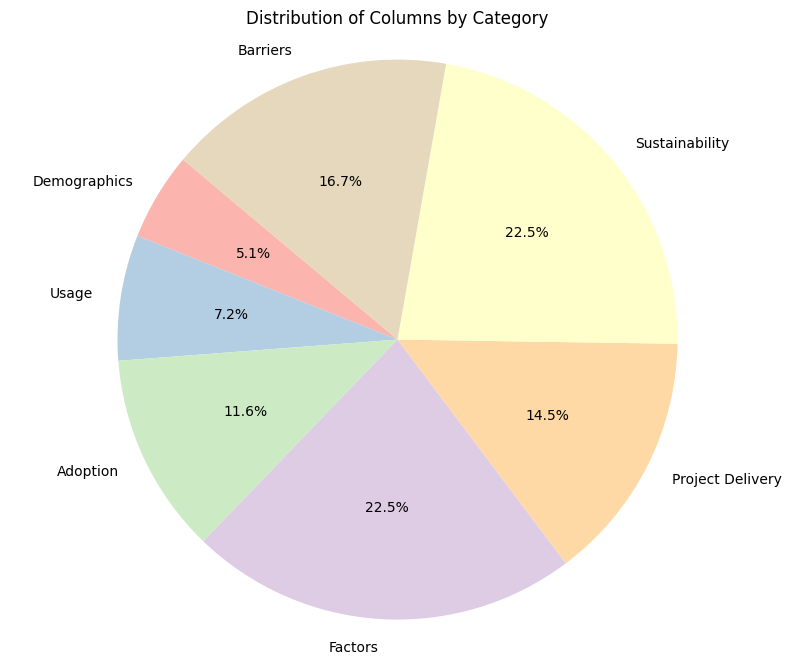

In [79]:
import matplotlib.pyplot as plt

# Define category prefixes
categories = {
    "Demographics": DEMOGRAPHICS,
    "Usage": USAGE,
    "Adoption": ADOPTION,
    "Factors": FACTORS,
    "Project Delivery": PROJECT_DELIVERY,
    "Sustainability": SUSTAINABILITY,
    "Barriers": BARRIERS
}

# Count columns in each category
category_counts = {}
for name, prefix in categories.items():
    category_counts[name] = len([col for col in df.columns if col.startswith(prefix)])

# Calculate "Other" for columns that don't match any category
other_cols = len(df.columns) - sum(category_counts.values())
if other_cols > 0:
    category_counts["Other"] = other_cols

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    category_counts.values(),
    labels=category_counts.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)

plt.title('Distribution of Columns by Category')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

### Frequency plot function

In [80]:
def plot_categorical_distribution(
    df, 
    column, 
    x_labels_dict,
    x_label='Category', 
    y_label='Frequency', 
    title='Distribution', 
    filename='output.png',
):
        
    categories_present = sorted(df[column].dropna().unique())

    labels = [x_labels_dict[val] for val in categories_present]
    palette = sns.color_palette("pastel", n_colors=len(labels))

    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=column, data=df, order=categories_present, palette=palette)

    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, fontsize=10)

    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14, weight='bold')

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
                int(height), ha="center", fontsize=9)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    sns.despine()
    plt.tight_layout()

    plt.savefig(f"{FIG_DIR}/{filename}", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

# Frequency plots for Demographic fields

In [81]:

gender_labels_dict = {
    1: "Male",
    2: "Female"
}
# plot_categorical_distribution(
#     df=df,
#     column="D_Gender",
#     x_labels_dict=gender_labels_dict,
#     x_label="Gender",
#     y_label="Number of Respondents",
#     title="Gender Distribution",
#     filename="gender_distribution.png"
# )
age_labels_dict = {
    1: "<20", 
    2: "21-30", 
    3: "31-40", 
    4: "41-50", 
    5: "Over 50"
}
# plot_categorical_distribution(
#     df=df,
#     column="D_Age",
#     x_labels_dict=age_labels_dict,
#     x_label="Age Group",
#     y_label="Number of Respondents",
#     title="Age Distribution",
#     filename="age_distribution.png"
# )
education_labels_dict = {
    1: "OND",
    2: "B.Sc./HND",
    3: "PGD",
    4: "MSc.",
    5: "Ph.D."
}
# plot_categorical_distribution(
#     df=df,
#     column="D_Education",
#     x_labels_dict=education_labels_dict,
#     x_label="Educational Qualification",
#     y_label="Number of Respondents",
#     title="Educational Qualification Distribution",
#     filename="education_distribution.png"
# )
position_labels_dict = {
    1: "Junior Staff",
    2: "Senior Staff"
}
# plot_categorical_distribution(
#     df=df,
#     column="D_Position",
#     x_labels_dict=position_labels_dict,
#     x_label="Staff Position",
#     y_label="Number of Respondents",
#     title="Position Distribution",
#     filename="position_distribution.png"
# )
experience_labels_dict = {
    1: "<5 years",
    2: "6-10 years",
    3: "11-15 years",
    4: "16-20 years",
    5: "Over 20 years"
}
# plot_categorical_distribution(
#     df=df,
#     column="D_Experience",
#     x_labels_dict=experience_labels_dict,
#     x_label="Years of Experience",
#     y_label="Number of Respondents",
#     title="Experience Distribution",
#     filename="experience_distribution.png"
# )
company_age_labels_dict = {
    1: "1-5 years",
    2: "6-10 years",
    3: "11-15 years",
    4: "16-20 years",
    5: "Over 20 years"
}
# plot_categorical_distribution(
#     df=df,
#     column="D_CompanyAge",
#     x_labels_dict=company_age_labels_dict,
#     x_label="Company Age",
#     y_label="Number of Respondents",
#     title="Company Age Distribution",
#     filename="company_age_distribution.png"
# )
employee_count_labels_dict = {
    1: "1-5",
    2: "6-10",
    3: "11-15",
    4: "16-20",
    5: "Above 20"
}
# plot_categorical_distribution(
#     df=df,
#     column="D_NumEmployees",
#     x_labels_dict=employee_count_labels_dict,
#     x_label="Number of Employees",
#     y_label="Number of Respondents",
#     title="Employee Count Distribution",
#     filename="employee_count_distribution.png"
# )



#Area plot for Usage fields
usage_cols = [col for col in df.columns if col.startswith(USAGE)]

usage_distribution = pd.DataFrame(index=range(1, 6))

for col in usage_cols:
    # Get value counts in order 1-5
    counts = df[col].value_counts().sort_index()
    percentages = (counts / counts.sum() * 100).round(0).astype(int).astype(str) + '%'
    
    # Combine counts and percentages
    combined = counts.astype(str) + ' (' + percentages + ')'
    
    # Add to our distribution table
    usage_distribution[col] = combined

usage_distribution = usage_distribution.T

# Optionally: Rename the index for clarity
usage_distribution.columns = [
    'Very Low (1)',
    'Low (2)',
    'Moderate (3)',
    'High (4)',
    'Very High (5)'
]

usage_distribution['Total'] = df[usage_cols].count()

print(usage_distribution)

# for col in usage_cols:
#     counts = df[col].value_counts().reindex(range(1, 6), fill_value=0)
#     usage_distribution[col] = counts

# plt.figure(figsize=(12, 6))
# for col in usage_distribution.columns:
#     plt.fill_between(usage_distribution.index, usage_distribution[col], alpha=0.15)
#     plt.plot(usage_distribution.index, usage_distribution[col], label=col)

# plt.title("Digital Technology Usage Distribution", fontsize=14, weight='bold')
# plt.xlabel("Response Level (5 = Very High ... 1 = Very Low)", fontsize=12)
# plt.ylabel("Number of Respondents", fontsize=12)
# plt.xticks([1, 2, 3, 4, 5])
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.legend(loc='upper right', fontsize=9)
# sns.despine()
# plt.tight_layout()

# plt.savefig(f"{FIG_DIR}/usage_area_chart.png", dpi=300, bbox_inches='tight')
# plt.show()
# plt.close()


                  Very Low (1)   Low (2) Moderate (3)  High (4) Very High (5)  \
U_BIM                      NaN  37 (63%)     18 (31%)    2 (3%)        2 (3%)   
U_IoT                   1 (2%)  24 (41%)     30 (51%)    2 (3%)        2 (3%)   
U_CloudComputing           NaN    2 (3%)     24 (41%)  31 (53%)        2 (3%)   
U_AR                  25 (42%)  32 (54%)          NaN    2 (3%)           NaN   
U_VR                  55 (93%)    2 (3%)          NaN    1 (2%)        1 (2%)   
U_SmartPhones              NaN    1 (2%)       2 (3%)  53 (90%)        3 (5%)   
U_ProjectSoftware          NaN    1 (2%)     26 (44%)  31 (53%)        1 (2%)   
U_Drones                1 (2%)  26 (44%)     31 (53%)    1 (2%)           NaN   
U_Blockchain            3 (5%)  24 (41%)     31 (53%)    1 (2%)           NaN   
U_3DPrinting          25 (42%)  31 (53%)          NaN    2 (3%)        1 (2%)   

                   Total  
U_BIM                 59  
U_IoT                 59  
U_CloudComputing      59  


# Data Reliability and Validity
### Cronbach’s Alpha for Reliability
To access internal consistency of sections

In [82]:
#data reliability and validity
import pingouin as pg
adoption_cols = [col for col in df.columns if col.startswith(ADOPTION)]
project_delivery_cols = [col for col in df.columns if col.startswith(PROJECT_DELIVERY)]
sustainability_cols = [col for col in df.columns if col.startswith(SUSTAINABILITY)]
barriers_cols = [col for col in df.columns if col.startswith(BARRIERS)]


a_alpha, a_ci = pg.cronbach_alpha(data=df[adoption_cols])
p_alpha, p_ci = pg.cronbach_alpha(data=df[project_delivery_cols])
s_alpha, s_ci = pg.cronbach_alpha(data=df[sustainability_cols])
b_alpha, b_ci = pg.cronbach_alpha(data=df[barriers_cols])

print(f"Cronbach's alpha for adoption = {a_alpha:.3f} (95% CI: {a_ci[0]:.3f} - {a_ci[1]:.3f})")
print(f"Cronbach's alpha for project delivery = {p_alpha:.3f} (95% CI: {p_ci[0]:.3f} - {p_ci[1]:.3f})")
print(f"Cronbach's alpha for sustainability = {s_alpha:.3f} (95% CI: {s_ci[0]:.3f} - {s_ci[1]:.3f})")
print(f"Cronbach's alpha for barriers = {b_alpha:.3f} (95% CI: {b_ci[0]:.3f} - {b_ci[1]:.3f})")


Cronbach's alpha for adoption = 0.954 (95% CI: 0.934 - 0.969)
Cronbach's alpha for project delivery = 0.962 (95% CI: 0.946 - 0.975)
Cronbach's alpha for sustainability = 0.965 (95% CI: 0.950 - 0.976)
Cronbach's alpha for barriers = 0.309 (95% CI: 0.027 - 0.541)


# Exploratory Factor Analysis (EFA)
Exploratory Factor Analysis (EFA) is a key step in identifying underlying latent variables that explain the observed correlations between measured variables. We will use this to interpret the loadings.

In [83]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler


### Factor Analysis Function

In [84]:
def run_factor_analysis(df, cols, n_factors=5, rotation='varimax'):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[cols])

    fa = FactorAnalyzer(n_factors=n_factors, rotation=rotation)
    fa.fit(scaled_data)

    eigenvalues = fa.get_eigenvalues()
    loadings = fa.loadings_

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
    plt.title(f"Scree Plot for {', '.join(cols)}")
    plt.xlabel('Factors')
    plt.ylabel('Eigenvalue')
    plt.grid(True)
    plt.show()

    loadings_df = pd.DataFrame(loadings, index=cols)
    print(f'Factor Loadings for {", ".join(cols)}:\n', loadings_df)

    return fa, loadings_df

### Factor Analysis

c:\Users\cw_10\Desktop\WRK\Elizbet\BOLAJI BARTHOLOMEW\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


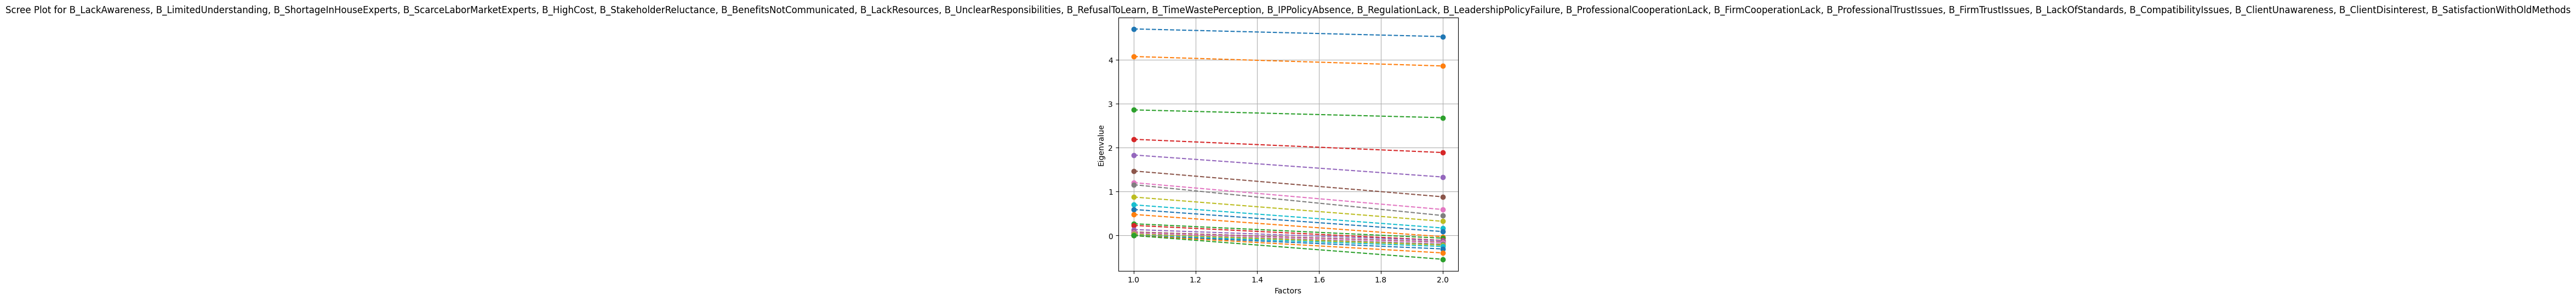

Factor Loadings for B_LackAwareness, B_LimitedUnderstanding, B_ShortageInHouseExperts, B_ScarceLaborMarketExperts, B_HighCost, B_StakeholderReluctance, B_BenefitsNotCommunicated, B_LackResources, B_UnclearResponsibilities, B_RefusalToLearn, B_TimeWastePerception, B_IPPolicyAbsence, B_RegulationLack, B_LeadershipPolicyFailure, B_ProfessionalCooperationLack, B_FirmCooperationLack, B_ProfessionalTrustIssues, B_FirmTrustIssues, B_LackOfStandards, B_CompatibilityIssues, B_ClientUnawareness, B_ClientDisinterest, B_SatisfactionWithOldMethods:
                                       0         1         2         3  \
B_LackAwareness               -0.371423 -0.568635 -0.083929  0.545333   
B_LimitedUnderstanding         0.121954 -0.028240 -0.183949  0.083641   
B_ShortageInHouseExperts       0.027921  0.747687 -0.226938  0.139117   
B_ScarceLaborMarketExperts    -0.413836  0.034787 -0.722737 -0.169318   
B_HighCost                     0.590240  0.699237  0.243588  0.180740   
B_StakeholderReluct

In [85]:
# fa_adoption, loadings_adoption = run_factor_analysis(df, adoption_cols)
# fa_project_delivery, loadings_project_delivery = run_factor_analysis(df, project_delivery_cols)
# fa_sustainability, loadings_sustainability = run_factor_analysis(df, sustainability_cols)
fa_barriers, loadings_barriers = run_factor_analysis(df, barriers_cols)
print(fa_barriers, loadings_barriers)

## Principal Component Analysis (PCA)
PCA reduces the dimensionality of the data while retaining as much variance as possible

In [86]:
from sklearn.decomposition import PCA

### PCA function

In [87]:
def run_pca(df, cols, n_components=5):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[cols])

    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_data)
    print(pca_result)

    explained_variance = pca.explained_variance_ratio_
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
    plt.title(f"Explained Variance by Principal Components for {', '.join(cols)}")
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid(True)
    plt.show()

    return pca, explained_variance, pca_result


### PCA's

[[-7.19951079  1.7573139  -0.07198958  0.37658285  0.25688729]
 [-3.21309866  1.91841409 -0.05249925  4.17439199  0.67198901]
 [ 9.68042185  4.64220039  0.22120379  2.29953187 -1.33863495]
 [ 2.24545471  4.53192873  0.8353989   1.76999654 -0.4075231 ]
 [-1.10164562  4.55493203 -3.55400995 -1.91376624  1.40535015]
 [ 5.89069257 -3.22188109 -3.51798679 -1.16616042 -1.93989983]
 [-1.10164562  4.55493203 -3.55400995 -1.91376624  1.40535015]
 [ 2.74968294  4.77906764  4.13546015 -3.9821783  -1.73876453]
 [ 2.87751494  3.74050289 -1.24739264  1.40091337 -1.31231771]
 [ 1.06296568 -0.57838736 -1.22071651  0.23833929  0.27860829]
 [ 1.88046464 -1.2040316  -0.49613303  0.02348799 -0.44092006]
 [ 1.88046464 -1.2040316  -0.49613303  0.02348799 -0.44092006]
 [-3.3563139  -0.30157368  0.12144011  0.01222278 -0.41164654]
 [ 2.45575736 -0.54526855  0.60957214 -0.06745629  0.80600715]
 [-3.3563139  -0.30157368  0.12144011  0.01222278 -0.41164654]
 [ 1.88046464 -1.2040316  -0.49613303  0.02348799 -0.44

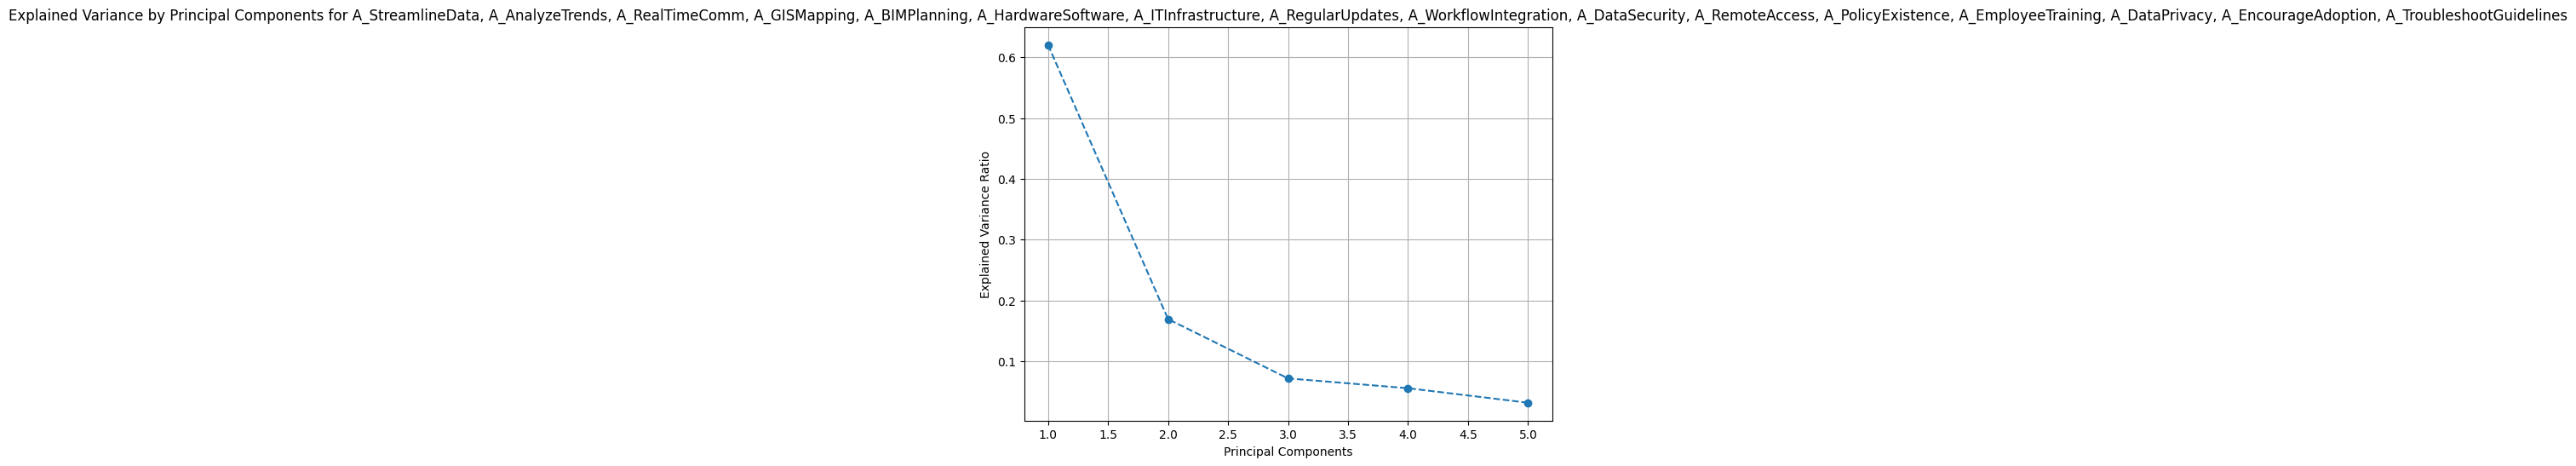

[[ 1.90154164 -0.13912615 -0.19019427 -0.37476187  1.19518331]
 [-4.75677025  2.05339735 -3.27218705 -1.49562069  1.72002896]
 [ 9.23979302  5.42130487  3.45777653  1.80313501 -2.40489511]
 [ 4.48924915  4.00919044  2.60158496 -2.60146164  1.9889776 ]
 [-4.64468977  4.53024318  2.53962047  2.33642016  2.42497061]
 [-4.11870986  3.73541884 -1.60625086  0.82416325 -0.08649185]
 [-5.79095234  3.54338111 -1.56266784 -3.22395518 -1.96873432]
 [ 2.60685859  3.30542708 -0.50273983 -1.05248823 -2.87032572]
 [ 2.98310718  4.70351451  2.56162047 -2.14160307  1.05939756]
 [ 1.47465362  3.94528688 -2.66213851  1.8144599  -0.34853333]
 [ 2.38252931  4.08774319 -2.91917842  1.00525848  0.55355698]
 [ 2.90059918 -1.265432   -0.21191704 -0.03920346  0.08676179]
 [-3.66655086 -0.52944202  0.4441754   0.14005826 -0.18116984]
 [ 2.90059918 -1.265432   -0.21191704 -0.03920346  0.08676179]
 [-3.66655086 -0.52944202  0.4441754   0.14005826 -0.18116984]
 [ 2.90059918 -1.265432   -0.21191704 -0.03920346  0.08

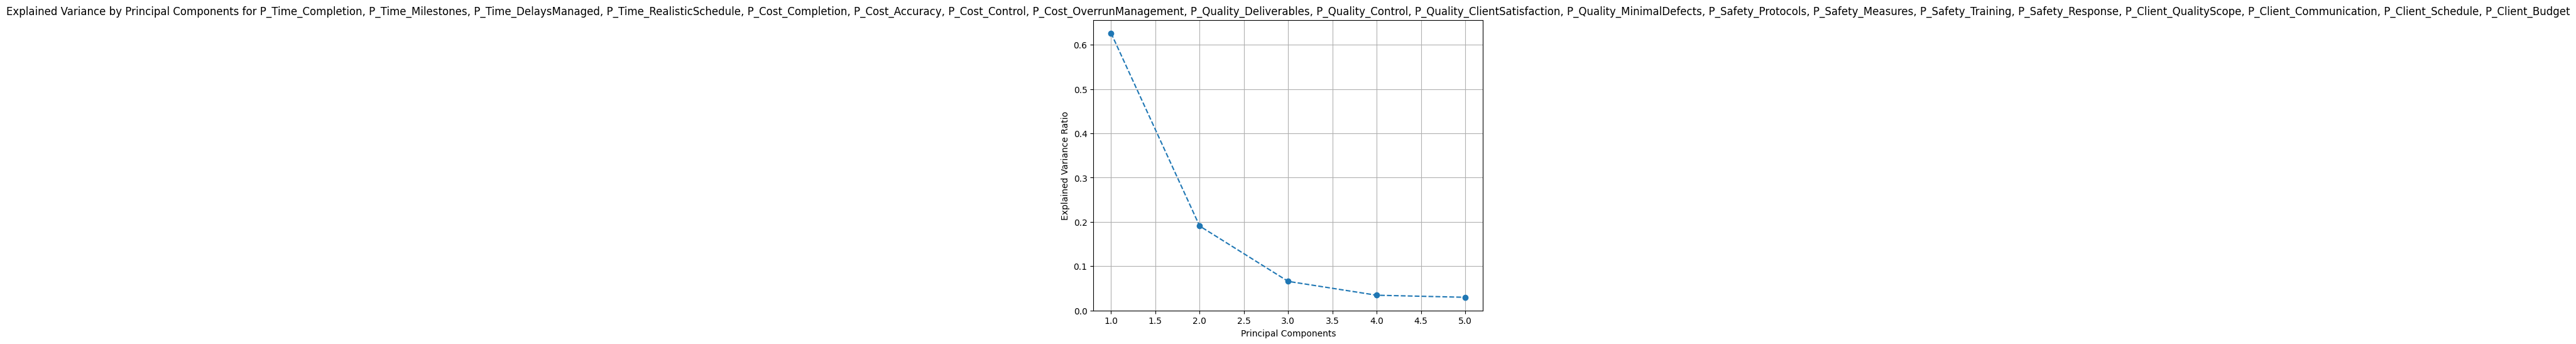

[[ 5.7920554  -0.51865261 -2.71650167 -3.08581425 -4.83192681]
 [ 0.28519958 -2.26197907  0.86051276 -1.79831475 -0.28485629]
 [13.65742716 -1.47928615  4.15367243 -3.12858482 -0.70665866]
 [ 3.79817919 -1.49457156  3.12150002  0.29716112  0.56970058]
 [-4.23685652 -8.93968569 -3.52097505  1.40597525  1.41566404]
 [-4.26047383 -4.45100599  1.11322286  2.26917454 -6.81382895]
 [-4.23685652 -8.93968569 -3.52097505  1.40597525  1.41566404]
 [ 6.31302105  0.07946164 -6.10757305 -6.94587974  0.80116831]
 [ 5.22661465 -1.52884117  5.24171524  0.67259742  0.96679017]
 [ 0.47806516 -4.63962079  2.42387869 -1.69361013  1.45930036]
 [ 2.76309946 -3.61532735  3.07522861 -1.39839746  0.61530144]
 [ 2.93480415  0.99163117 -0.60032298  0.95642094  0.15614503]
 [-4.63006186  0.94380106  0.38425566 -0.54644885  0.05843831]
 [ 2.93480415  0.99163117 -0.60032298  0.95642094  0.15614503]
 [-4.63006186  0.94380106  0.38425566 -0.54644885  0.05843831]
 [ 2.93480415  0.99163117 -0.60032298  0.95642094  0.15

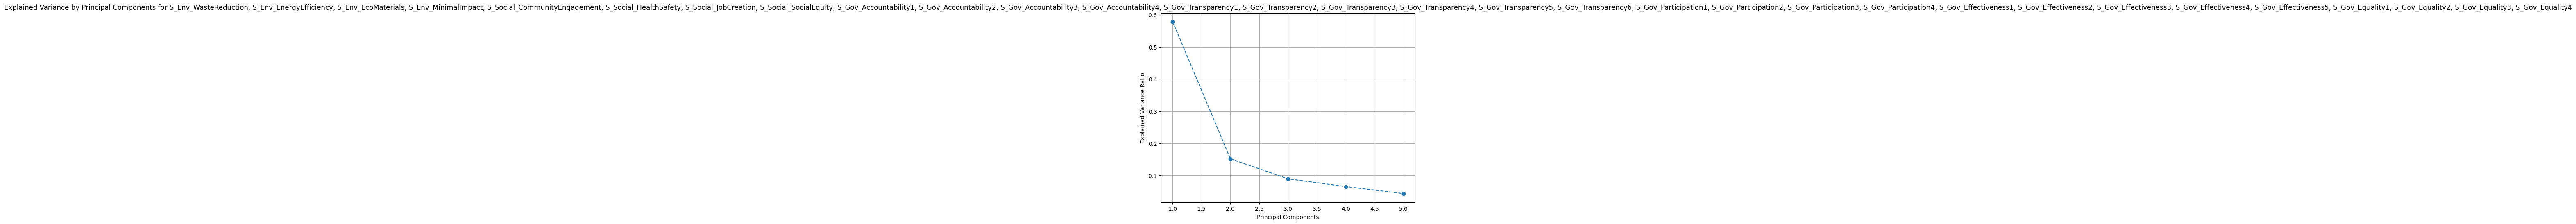

[[ 0.41035344 -0.70305873 -3.00427651 -1.20040634 -1.99717092]
 [ 2.30786298  1.71976265  1.20999636 -1.47235509 -0.65891019]
 [ 5.16668169  0.63714787 -0.76009483  5.92878838  3.95550092]
 [ 1.62966336  0.88778358 -0.08692409 -1.07317301 -3.58347764]
 [ 3.64446021  4.65179622  0.81632031 -2.38277933 -1.00810021]
 [ 4.86976748  3.12665444  3.71914894 -4.43939728  1.43509927]
 [ 3.6679448   4.67721359  0.99026026 -2.94911882 -1.10814704]
 [ 3.38079946  0.71338295  5.32363255  0.45832271  1.60400951]
 [ 2.85601713  0.53459134  3.8402422   2.38706511  0.07993102]
 [ 1.93666157  1.41366829  1.3808068   3.37053461 -2.37725519]
 [ 1.83978212  0.86733379  1.31626726  3.13610933 -2.36097354]
 [ 1.72419377 -1.43064824 -2.15281974 -0.21743664  0.53337681]
 [-1.97416084  1.8013158  -0.09352798  0.06969579  1.85319944]
 [-1.14953045 -3.1374892   1.25392327 -0.19428142 -0.54395508]
 [-1.99069507  1.53644327 -0.42511506 -0.17577386 -0.10660525]
 [ 1.79287533 -1.50310688 -2.07191258 -0.52399456  0.12

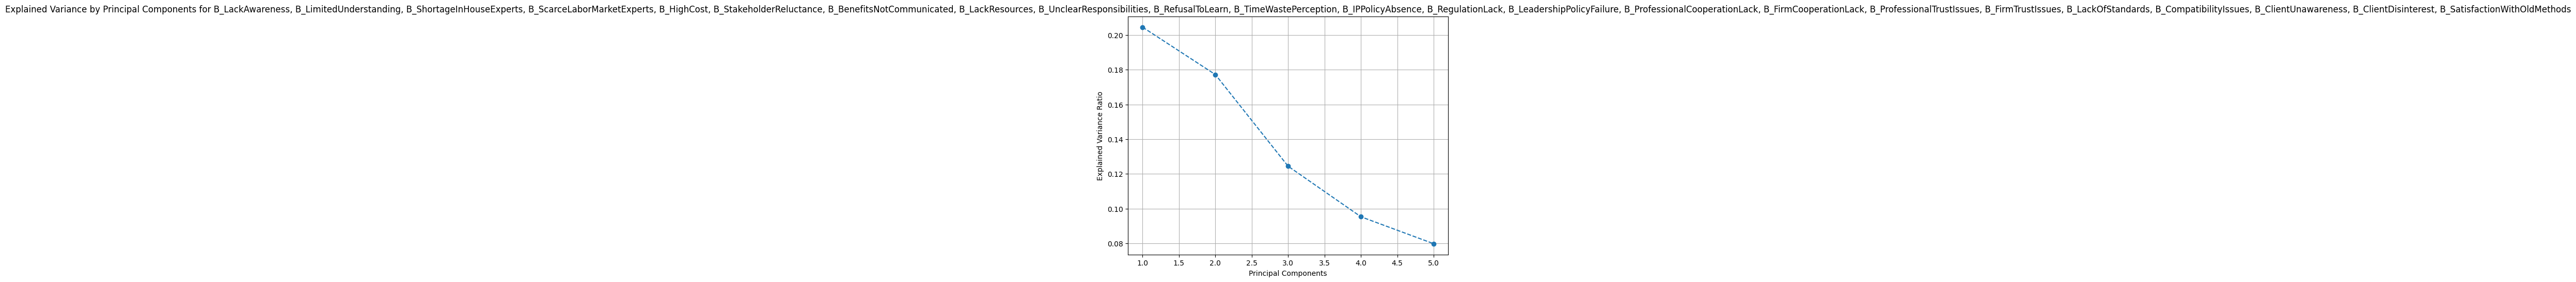

In [88]:
pca_adoption, explained_variance_adoption, pca_result_adoption = run_pca(df, adoption_cols)
pca_project_delivery, explained_variance_project_delivery, pca_result_project_delivery = run_pca(df, project_delivery_cols)
pca_sustainability, explained_variance_sustainability, pca_result_sustainability = run_pca(df, sustainability_cols)
pca_barriers, explained_variance_barriers, pca_result_barriers = run_pca(df, barriers_cols)

### Factor Loadings Visualization

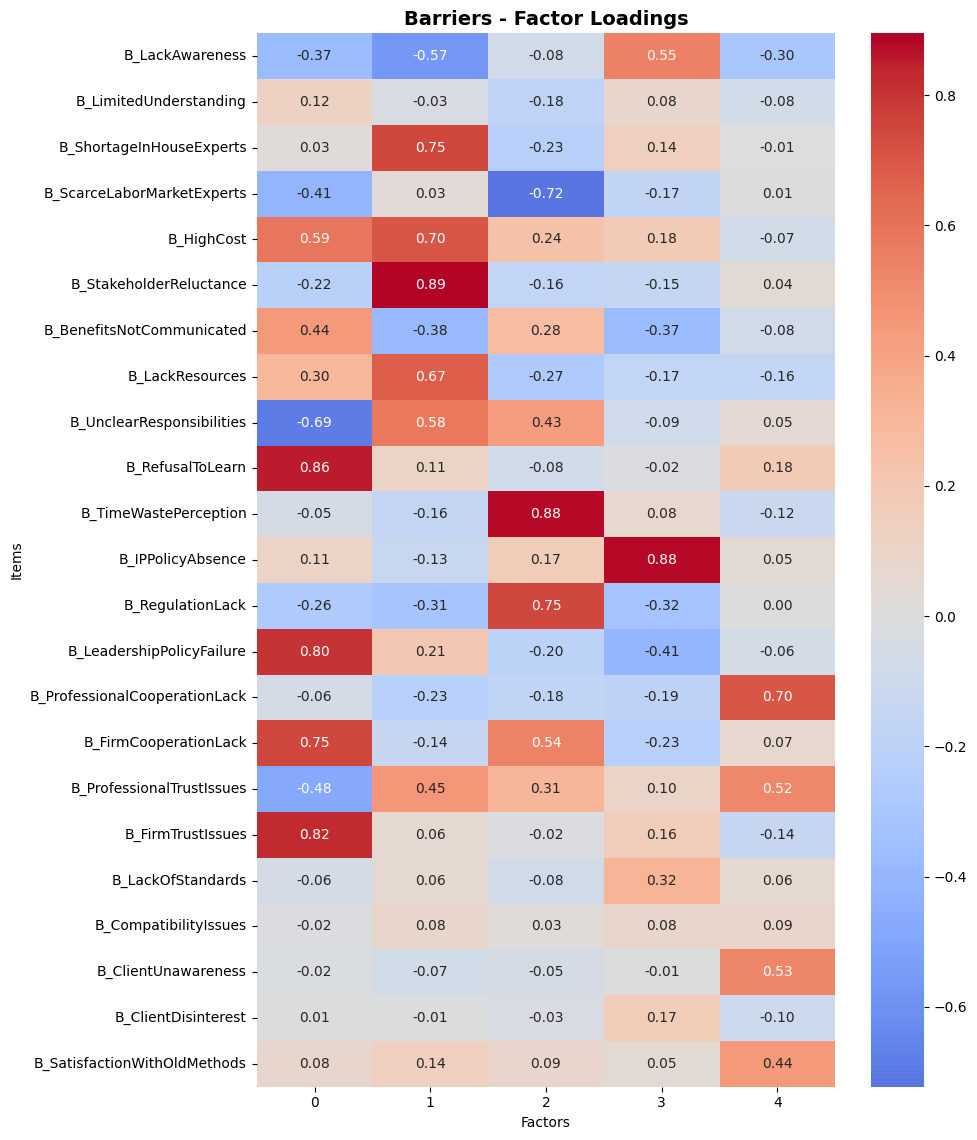

In [89]:
def plot_factor_loadings(loadings_df, title='Factor Loadings'):
    plt.figure(figsize=(10, min(0.5 * len(loadings_df), 12)))
    sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0, fmt=".2f")
    plt.title(title, fontsize=14, weight='bold')
    plt.xlabel("Factors")
    plt.ylabel("Items")
    plt.tight_layout()
    plt.show()

# plot_factor_loadings(loadings_adoption, title="Adoption - Factor Loadings")
# plot_factor_loadings(loadings_project_delivery, title="Project delivery - Factor Loadings")
# plot_factor_loadings(loadings_sustainability, title="Sustainability - Factor Loadings")
plot_factor_loadings(loadings_barriers, title="Barriers - Factor Loadings")

### PCA Biplot for 2D Projection

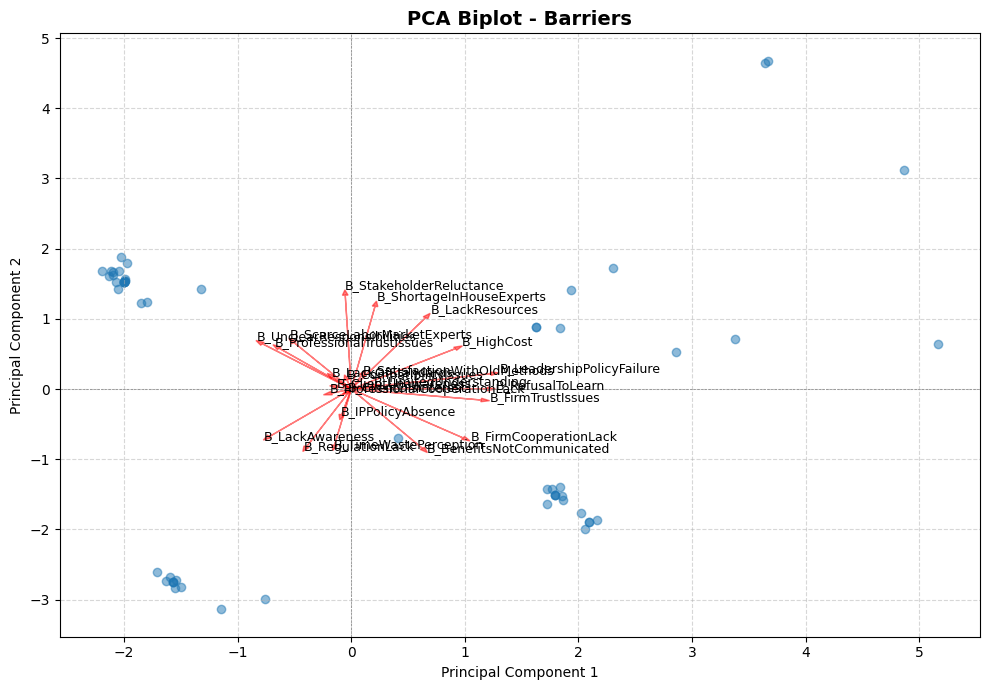

In [ ]:
def pca_biplot(pca, components, features, labels=None, title='PCA Biplot'):
    plt.figure(figsize=(10, 7))
    
    plt.scatter(components[:, 0], components[:, 1], alpha=0.5, label='Respondents')
    
    feature_vectors = pca.components_[:2].T 
    for i, v in enumerate(feature_vectors):
        plt.arrow(0, 0, v[0]*3, v[1]*3, 
                  color='r', alpha=0.5, head_width=0.05)
        plt.text(v[0]*3.2, v[1]*3.2, labels[i] if labels else f"Var{i+1}", 
                 color='black', fontsize=9)

    plt.axhline(0, linestyle='--', color='gray', linewidth=0.5)
    plt.axvline(0, linestyle='--', color='gray', linewidth=0.5)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(title, fontsize=14, weight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
pca_biplot(
    pca=pca_adoption,
    components=pca_result_adoption,
    features=adoption_cols,
    labels=adoption_cols,
    title="PCA Biplot - Adoption"
)

pca_biplot(
    pca=pca_project_delivery,
    components=pca_result_project_delivery,
    features=project_delivery_cols,
    labels=project_delivery_cols,
    title="PCA Biplot - Project delivery"
)

pca_biplot(
    pca=pca_sustainability,
    components=pca_result_sustainability,
    features=sustainability_cols,
    labels=sustainability_cols,
    title="PCA Biplot - Sustainability"
)

pca_biplot(
    pca=pca_barriers,
    components=pca_result_barriers,
    features=barriers_cols,
    labels=barriers_cols,
    title="PCA Biplot - Barriers"
)


# 6 Inferential Statistics

### 6.1 Correlation Analysis — Adoption, Sustainability, Delivery

                    Adoption_Avg  Sustainability_Avg  Delivery_Avg
Adoption_Avg            1.000000            0.766312      0.830004
Sustainability_Avg      0.766312            1.000000      0.957611
Delivery_Avg            0.830004            0.957611      1.000000


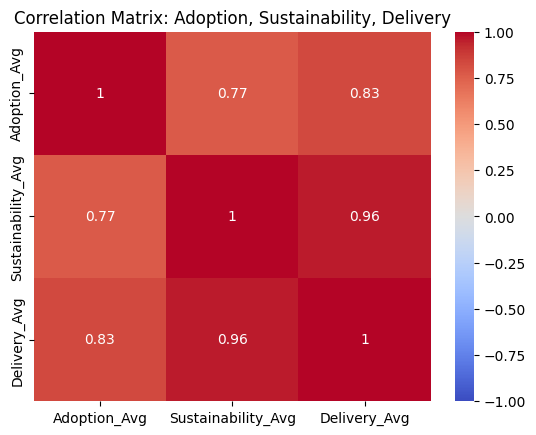

In [91]:
df["Adoption_Avg"] = df[adoption_cols].mean(axis=1)
df["Sustainability_Avg"] = df[sustainability_cols].mean(axis=1)
df["Delivery_Avg"] = df[project_delivery_cols].mean(axis=1)


corr_matrix = df[["Adoption_Avg", "Sustainability_Avg", "Delivery_Avg"]].corr()
print(corr_matrix)


sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix: Adoption, Sustainability, Delivery")
plt.show()

### 6.2 Group Comparisons - T-Tests or ANOVA
Test if adoption levels differ significantly between:
    - staff positions (`D_Position`)
    - Years of experience (`D_Experience`)

In [92]:
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols

junior = df[df["D_Position"] == 1]["Adoption_Avg"]
senior = df[df["D_Position"] == 2]["Adoption_Avg"]

t_stat, p_val = ttest_ind(junior, senior, equal_var=False)
print(f"T-test (Position): t={t_stat:.3f}, p={p_val:.3f}")


anova = ols('Adoption_Avg ~ C(D_Experience)', data=df).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)
print(anova_table)

T-test (Position): t=-9.611, p=0.000
                   sum_sq    df         F        PR(>F)
C(D_Experience)  8.908047   4.0  18.48272  1.277875e-09
Residual         6.506545  54.0       NaN           NaN


### 6.3 Multiple Regression — Predicting Delivery from Adoption
Use adoption score to predict project delivery performance.

In [93]:
# Independent variables
X = df[["Adoption_Avg"]]
X = sm.add_constant(X)

# Dependent variable
y = df["Delivery_Avg"]

# Fit regression model
model = sm.OLS(y, X).fit()
print(model.summary())


# with demographic controls

X = df[["Adoption_Avg", "D_Position", "D_Experience"]]
X = sm.add_constant(X)
model_with_controls = sm.OLS(y, X).fit()
print(model_with_controls.summary())

                            OLS Regression Results                            
Dep. Variable:           Delivery_Avg   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     126.2
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           4.44e-16
Time:                        07:14:53   Log-Likelihood:                -7.0927
No. Observations:                  59   AIC:                             18.19
Df Residuals:                      57   BIC:                             22.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7851      0.223      3.521   

# 7 Machine Learning Models

In [94]:
import sys
sys.path.append(os.path.abspath(os.path.join("..")))

from models.classification import classify_adoption_delivery
from models.clustering import cluster_respodents
from models.decision_tree import decision_tree_adoption
from models.evaluate import evaluate_model

def run_model_analysis(df):
    """
    Executes all ML model workflows from Phase 7 on the provided DataFrame.
    Returns a dictionary of results from classification, clustering, decision tree, and evaluation.
    """

    results = {}

    # --- 1. Classification: Predict high vs. low delivery ---
    print("Running classification (Random Forest)...")
    classification_report_data, clf = classify_adoption_delivery(df)
    results['classification'] = {
        "model": clf,
        "report": classification_report_data
    }

    # --- 2. Clustering: Segment firms/respondents ---
    print("Running clustering (KMeans)...")
    df, kmeans = cluster_respodents(df)
    cluster_counts = df["Cluster"].value_counts().to_dict()
    results['clustering'] = {
        "model": kmeans,
        "cluster_distribution": cluster_counts
    }

    # --- 3. Decision Tree: Identify adoption success rules ---
    print("Training decision tree model...")
    tree_model, feature_names = decision_tree_adoption(df)
    results['decision_tree'] = {
        "model": tree_model,
        "features": list(feature_names)
    }

    # --- 4. Evaluation Metrics for Classification ---
    print("Calculating evaluation metrics...")
    # Reuse X/y split for prediction
    X = df[["Adoption_Avg", "D_Position", "D_Experience"]]
    y_true = (df["Delivery_Avg"] > df["Delivery_Avg"].median()).astype(int)
    y_pred = clf.predict(X)

    eval_scores = evaluate_model(y_true, y_pred)
    results['evaluation'] = eval_scores

    print("Phase 7 analysis complete.\n")
    return df, results


print(run_model_analysis(df))

Running classification (Random Forest)...
Running clustering (KMeans)...
Training decision tree model...
Calculating evaluation metrics...
Phase 7 analysis complete.

(    D_Gender  D_Age  D_Education  D_Position  D_Experience  D_CompanyAge  \
0          2      4            3           2             3             5   
1          1      3            3           2             4             1   
2          2      2            2           2             5             5   
3          1      4            2           2             4             5   
4          1      5            5           2             4             5   
5          1      5            5           2             5             5   
6          1      5            5           2             4             5   
7          2      2            3           2             2             3   
8          1      2            2           1             1             5   
9          1      3            2           2             3             5

===== MACHINE LEARNING ANALYSIS =====

Running performance classification...

Classification Results:
Accuracy: 0.92, Precision: 0.90, Recall: 1.00, F1: 0.95


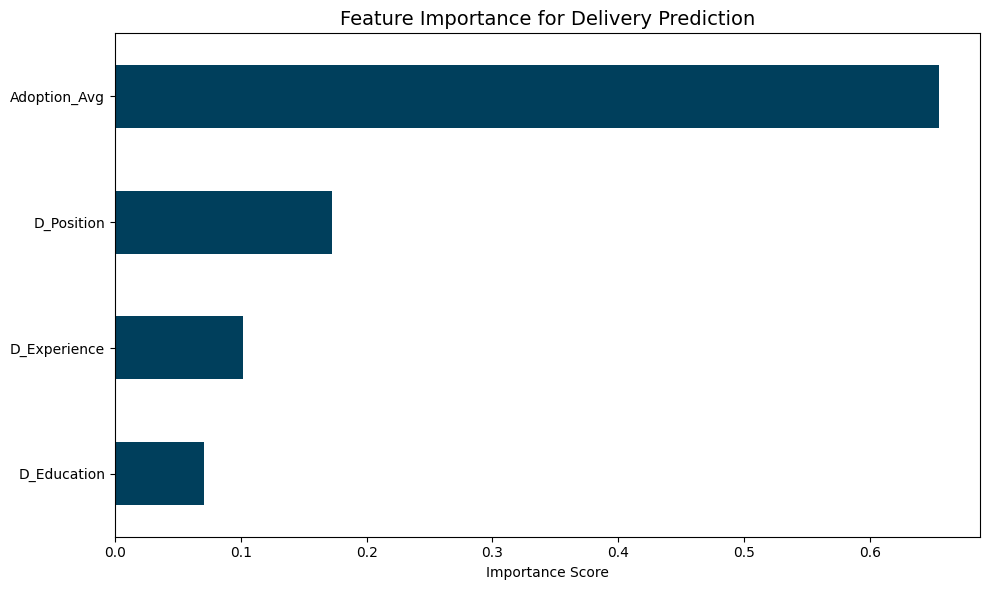


Clustering respondents...


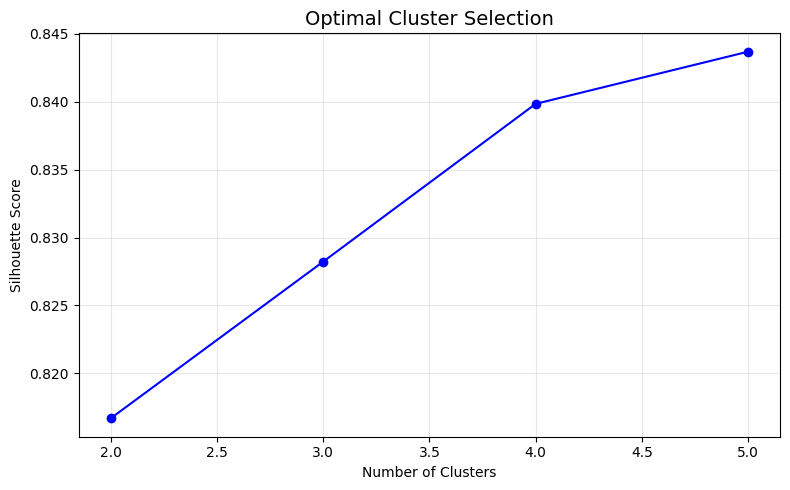

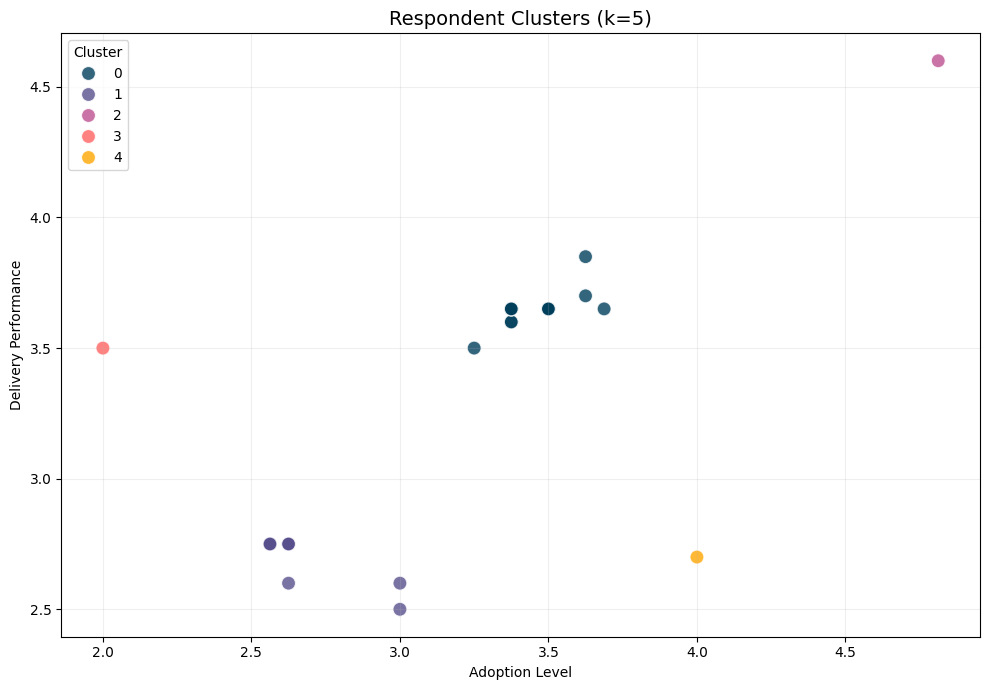


Cluster Profiles:
         Adoption_Avg  Delivery_Avg  Sustainability_Avg
Cluster                                                
0            3.461694         3.650            3.009365
1            2.617500         2.728            2.285161
2            4.812500         4.600            4.161290
3            2.000000         3.500            3.322581
4            4.000000         2.700            2.225806

Extracting adoption rules...


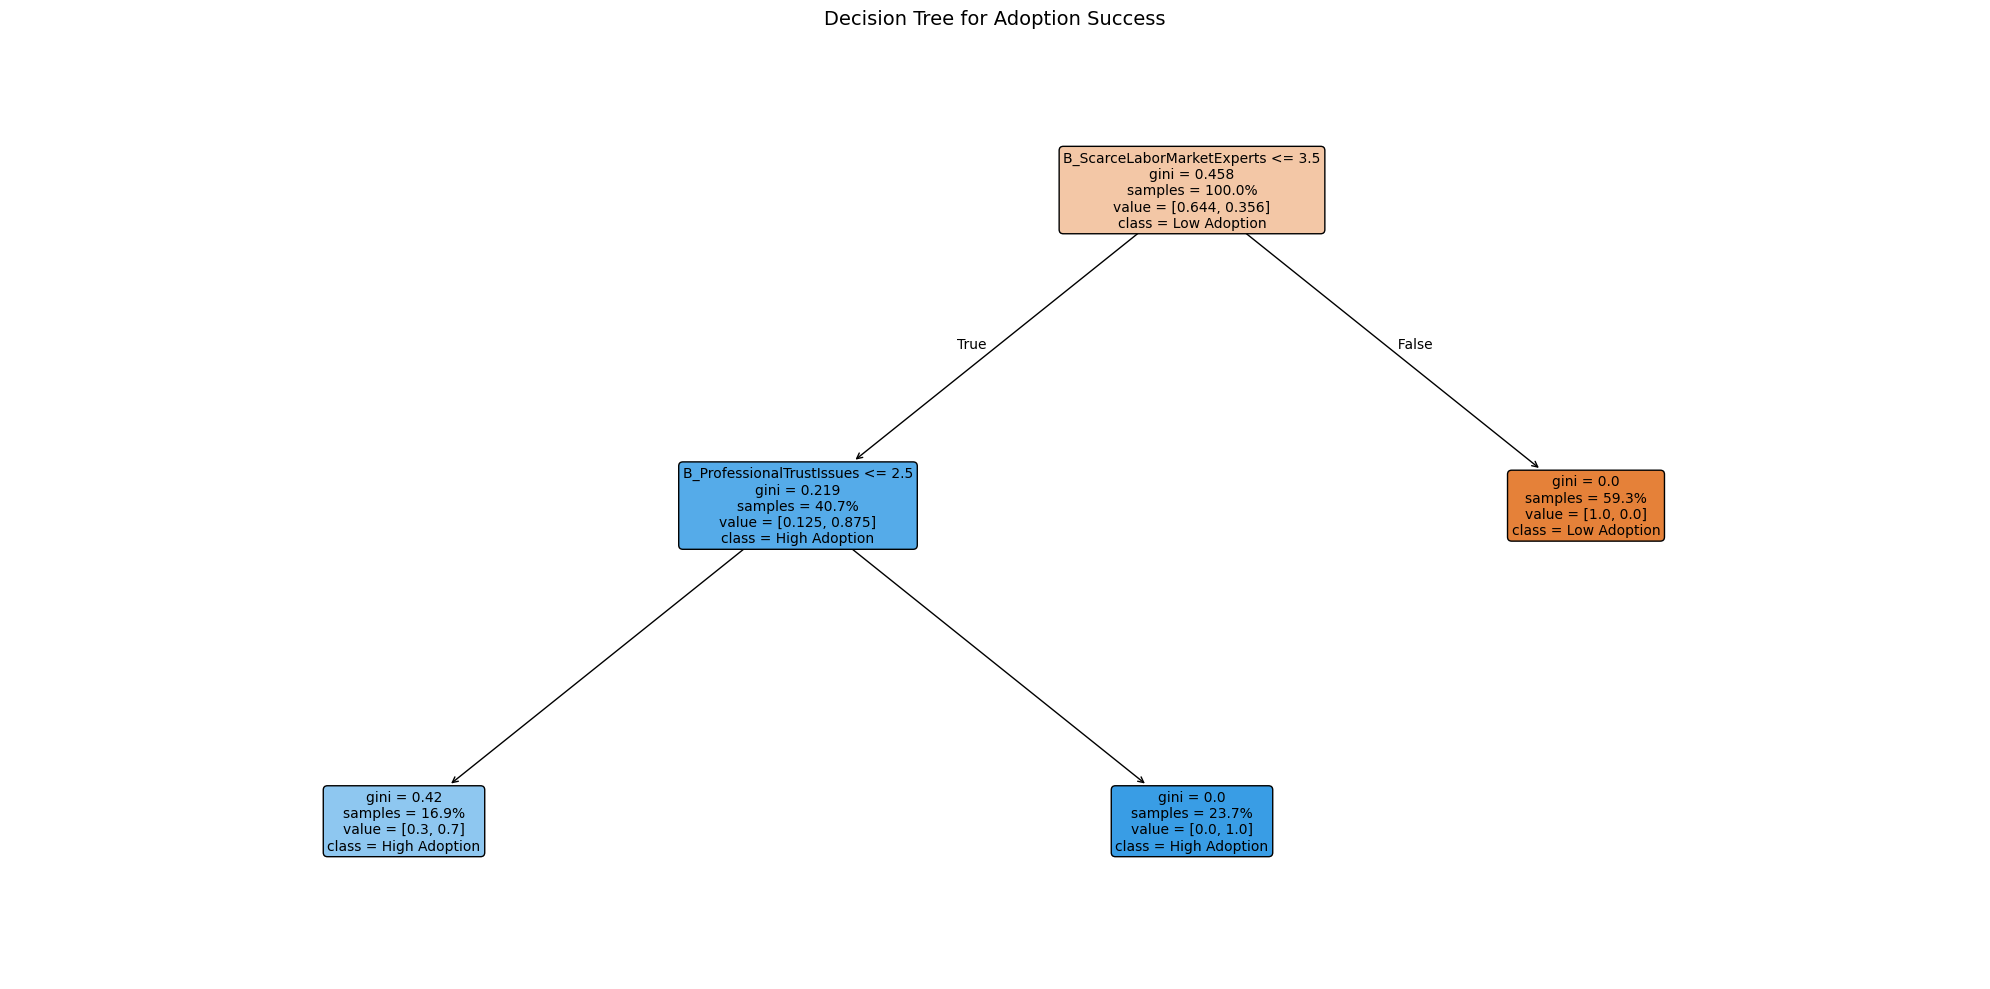


Decision Tree Rules:
|--- B_ScarceLaborMarketExperts <= 3.50
|   |--- B_ProfessionalTrustIssues <= 2.50
|   |   |--- class: 1
|   |--- B_ProfessionalTrustIssues >  2.50
|   |   |--- class: 1
|--- B_ScarceLaborMarketExperts >  3.50
|   |--- class: 0


Evaluating classification model...


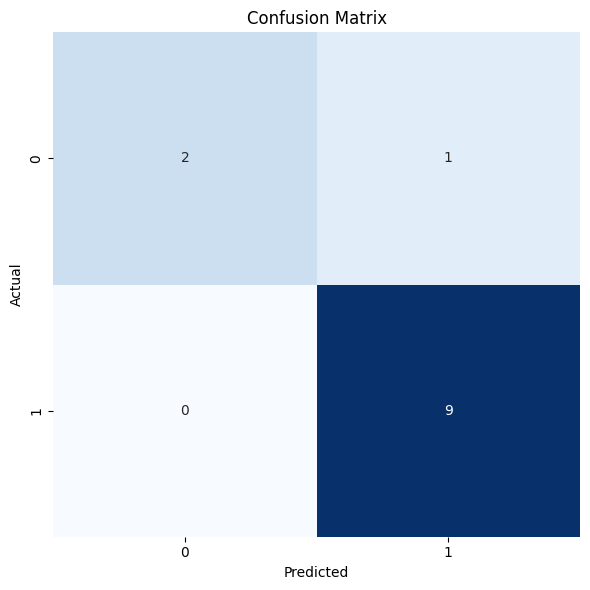


Model Evaluation:
Accuracy: 0.917
Precision: 0.900
Recall: 1.000
F1 Score: 0.947

Machine Learning Pipeline Complete!
{'classification_model': RandomForestClassifier(random_state=42), 'clustering_model': KMeans(n_clusters=5, n_init=10, random_state=42), 'decision_tree': DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42), 'metrics': {'accuracy': 0.9166666666666666, 'precision': 0.9, 'recall': 1.0, 'f1': 0.9473684210526315}}


In [95]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, silhouette_score)
import numpy as np

# --- 7.1 Classification: Predict high vs. low delivery performance ---
def classify_performance(df):
    """Predict project delivery performance (high/low) based on adoption"""
    # Create target: 1 if delivery above median, else 0
    df['Delivery_High'] = (df['Delivery_Avg'] > df['Delivery_Avg'].median()).astype(int)
    
    # Features: Adoption factors and key demographics
    features = ['Adoption_Avg', 'D_Position', 'D_Experience', 'D_Education']
    X = df[features]
    y = df['Delivery_High']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("\nClassification Results:")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")
    
    # Feature importance
    importances = pd.Series(model.feature_importances_, index=features)
    plt.figure(figsize=(10, 6))
    importances.sort_values().plot.barh(color=PLOT_PALATTE[0])
    plt.title("Feature Importance for Delivery Prediction", fontsize=14)
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.savefig(f"{FIG_DIR}/feature_importance_delivery.png", dpi=300)
    plt.show()
    
    return model, accuracy

# --- 7.2 Clustering: Segment firms/respondents ---
def cluster_respondents(df):
    """Cluster respondents based on adoption, delivery, and sustainability"""
    # Prepare clustering features
    cluster_features = ['Adoption_Avg', 'Delivery_Avg', 'Sustainability_Avg']
    X = df[cluster_features]
    
    # Find optimal clusters using silhouette score
    silhouette_scores = []
    cluster_range = range(2, 6)
    
    for n in cluster_range:
        kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        silhouette_scores.append(silhouette_score(X, labels))
    
    # Plot silhouette scores
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, silhouette_scores, 'bo-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Optimal Cluster Selection", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{FIG_DIR}/silhouette_scores.png", dpi=300)
    plt.show()
    
    # Apply best clustering
    optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
    df['Cluster'] = kmeans.fit_predict(X)
    
    # Visualize clusters
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x='Adoption_Avg', 
        y='Delivery_Avg', 
        hue='Cluster', 
        data=df, 
        palette=PLOT_PALATTE,
        s=100,
        alpha=0.8
    )
    plt.title(f"Respondent Clusters (k={optimal_clusters})", fontsize=14)
    plt.xlabel("Adoption Level")
    plt.ylabel("Delivery Performance")
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.savefig(f"{FIG_DIR}/respondent_clusters.png", dpi=300)
    plt.show()
    
    # Cluster profiles
    cluster_profiles = df.groupby('Cluster')[cluster_features].mean()
    print("\nCluster Profiles:")
    print(cluster_profiles)
    
    return df, kmeans

# --- 7.3 Decision Tree: Identify adoption success rules ---
def adoption_success_rules(df):
    """Identify decision rules for successful technology adoption"""
    # Create target: 1 if adoption above median
    df['Adoption_High'] = (df['Adoption_Avg'] > df['Adoption_Avg'].median()).astype(int)
    
    # Features: Barriers and demographics
    barrier_features = [col for col in barriers_cols]
    features = barrier_features + ['D_Position', 'D_Experience', 'D_CompanyAge']
    X = df[features]
    y = df['Adoption_High']
    
    # Train decision tree
    tree = DecisionTreeClassifier(
        max_depth=3,  # Limit depth for interpretability
        min_samples_leaf=10,
        random_state=42
    )
    tree.fit(X, y)
    
    # Visualize tree
    plt.figure(figsize=(20, 10))
    plot_tree(
        tree, 
        feature_names=features, 
        class_names=['Low Adoption', 'High Adoption'],
        filled=True,
        proportion=True,
        rounded=True,
        fontsize=10
    )
    plt.title("Decision Tree for Adoption Success", fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{FIG_DIR}/adoption_decision_tree.png", dpi=300)
    plt.show()
    
    # Extract rules
    tree_rules = export_text(tree, feature_names=features)
    print("\nDecision Tree Rules:")
    print(tree_rules)
    
    return tree

# --- 7.4 Evaluate Models ---
def evaluate_classification(model, X_test, y_test):
    """Evaluate classification model performance"""
    y_pred = model.predict(X_test)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig(f"{FIG_DIR}/confusion_matrix.png", dpi=300)
    plt.show()
    
    # Classification report
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("\nModel Evaluation:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# --- Execute all ML workflows ---
def run_ml_pipeline(df):
    print("===== MACHINE LEARNING ANALYSIS =====")
    
    # 7.1 Classification
    print("\nRunning performance classification...")
    clf_model, clf_accuracy = classify_performance(df)
    
    # 7.2 Clustering
    print("\nClustering respondents...")
    df, cluster_model = cluster_respondents(df)
    
    # 7.3 Decision Tree
    print("\nExtracting adoption rules...")
    tree_model = adoption_success_rules(df)
    
    # 7.4 Evaluation (using classification model)
    print("\nEvaluating classification model...")
    # Prepare test data for evaluation
    features = ['Adoption_Avg', 'D_Position', 'D_Experience', 'D_Education']
    X = df[features]
    y = (df['Delivery_Avg'] > df['Delivery_Avg'].median()).astype(int)
    _, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    metrics = evaluate_classification(clf_model, X_test, y_test)
    
    print("\nMachine Learning Pipeline Complete!")
    return df, {
        'classification_model': clf_model,
        'clustering_model': cluster_model,
        'decision_tree': tree_model,
        'metrics': metrics
    }

# Execute the full pipeline
df, ml_results = run_ml_pipeline(df)

print(ml_results)